<font color='navy'> 
    
# Data Preprocessing and Exploration
    
</font>

## Introduction
Data preprocessing and exploration are critical steps in the development of effective AI models. Real-world data is often incomplete, noisy, and prone to errors and inconsistencies, which can negatively impact the performance and accuracy of machine learning models. To overcome these challenges, data scientists must first preprocess and clean the data to ensure that it is accurate, complete, and ready for analysis. In this lab, we will focus on the Adult Income dataset from the UCI Machine Learning Repository, which contains information about individuals from the 1994 US Census and their demographic and employment characteristics. We will explore various data preprocessing techniques, such as handling missing or corrupted data and scaling the features, and learn how to perform feature engineering to improve the performance of machine learning models.

## Objectives
The main objectives of this Jupyter notebook are:

* To understand the challenges of data quality, bias, and interpretability in artificial intelligence and learn how to address them.
* To learn how to preprocess and explore data using Python and best practices in data preprocessing, such as handling missing or corrupted data and visualizing the data to gain insights.
* To learn how to perform feature engineering using Python to select or create new features that will improve the performance of machine learning models.
* To build a machine learning model using the preprocessed data to predict whether an individual's income is greater than $50K per year.


## Tools and Libraries
For this Jupyter notebook, we will need the following tools and libraries:

1. Python 3.x
2. Jupyter Notebook
3. Pandas library for data manipulation and analysis
4. Numpy library for mathematical operations
5. Scikit-learn library for machine learning algorithms
6. Matplotlib library for data visualization
7. Seaborn library for data visualization
8. Random for generating random numbers

## Data
We will be using the Adult Income dataset from the UCI Machine Learning Repository. This dataset contains information about individuals from the 1994 US Census and includes various demographic and employment attributes such as age, education level, occupation, work class, and marital status. The goal of this dataset is to predict whether an individual's income is greater than $50K per year based on their demographic and employment characteristics.

## 1. Importing Libraries and Loading Data
Let's start by importing the necessary libraries and loading the Diabetes dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## 2. Loading the Adult Income dataset

Load the dataset using Pandas and print the first few rows of the data to get a sense of the features and their types.

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv(data_url, header=None, names=columns)
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3. Data Exploration and Visualization


### 3.1 Data Exploration

####  Descriptive Statistics

In [3]:
# Calculate descriptive statistics for all variables
print('Categorical Statistics:')
print(df.describe(include=['O']))
# Calculate descriptive statistics for numerical variables
num_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
print('\nNumerical Statistics:')
print(df.describe())


Categorical Statistics:
       workclass education       marital-status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native-country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720  

Numerical Statistics:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    4

#### Correlation Analysis

<Axes: >

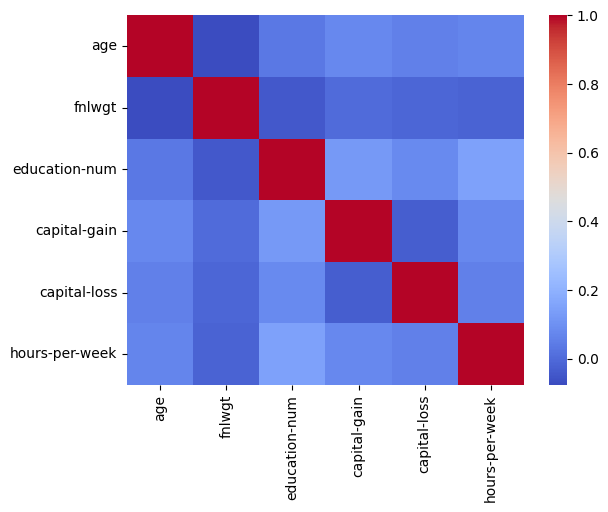

In [4]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, cmap="coolwarm")

### 3.2 Data Visualization

#### Histograms and Density Plots

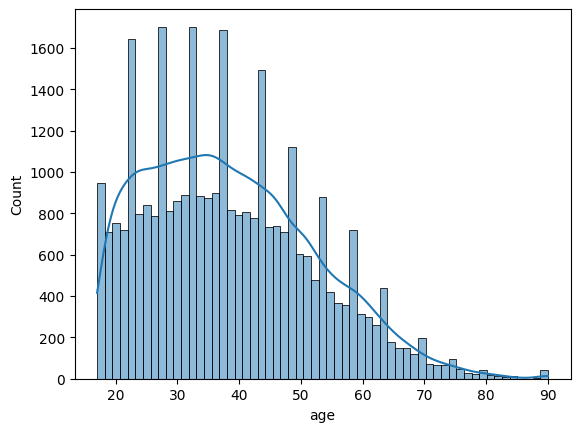

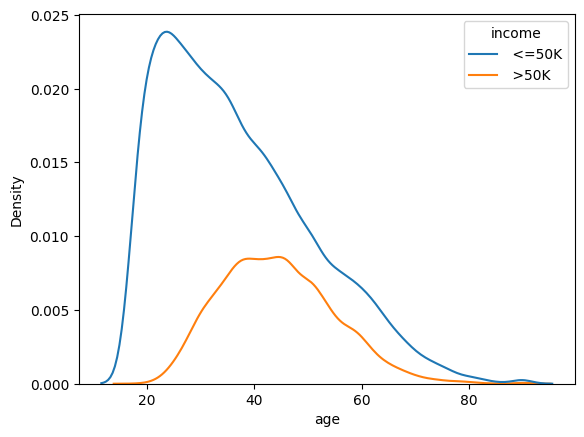

In [5]:
# Visualize age distribution using a histogram
sns.histplot(df["age"], kde=True)
plt.show()

# Visualize age distribution by income level using a density plot
sns.kdeplot(data=df, x="age", hue="income")
plt.show()


#### Boxplots and Violin Plots

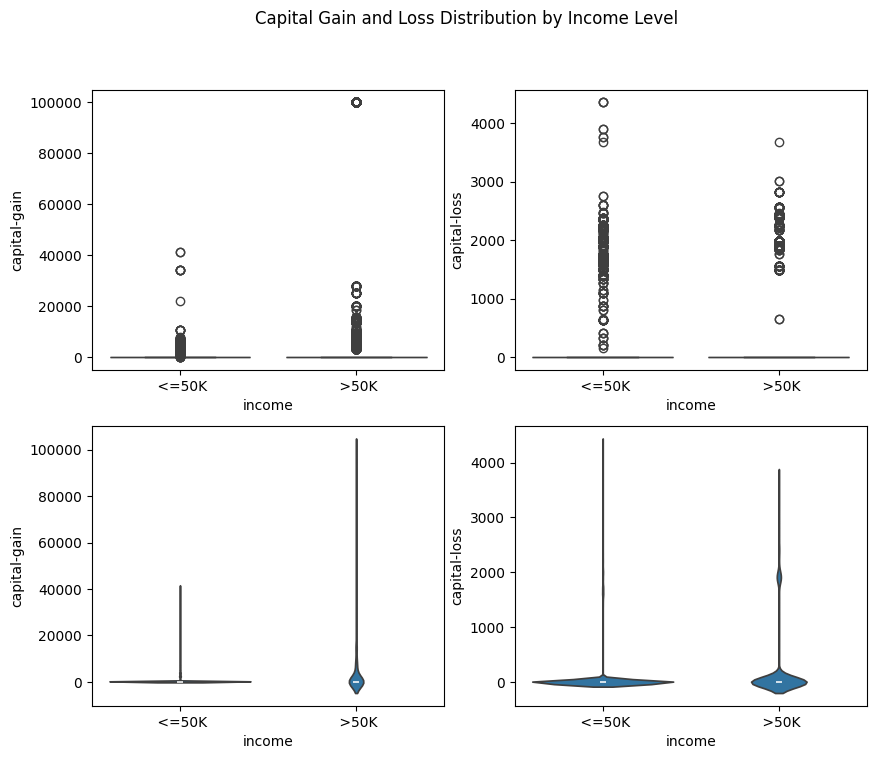

In [6]:
import matplotlib.pyplot as plt

# Create figure with two rows of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Visualize capital gain and capital loss distribution by income level using boxplots
sns.boxplot(x="income", y="capital-gain", data=df, ax=axes[0, 0])
sns.boxplot(x="income", y="capital-loss", data=df, ax=axes[0, 1])

# Visualize capital gain and capital loss distribution by income level using violin plots
sns.violinplot(x="income", y="capital-gain", data=df, ax=axes[1, 0])
sns.violinplot(x="income", y="capital-loss", data=df, ax=axes[1, 1])

# Set overall title for the figure
fig.suptitle("Capital Gain and Loss Distribution by Income Level")

# Display the plots
plt.show()


#### Pairwise Scatterplots

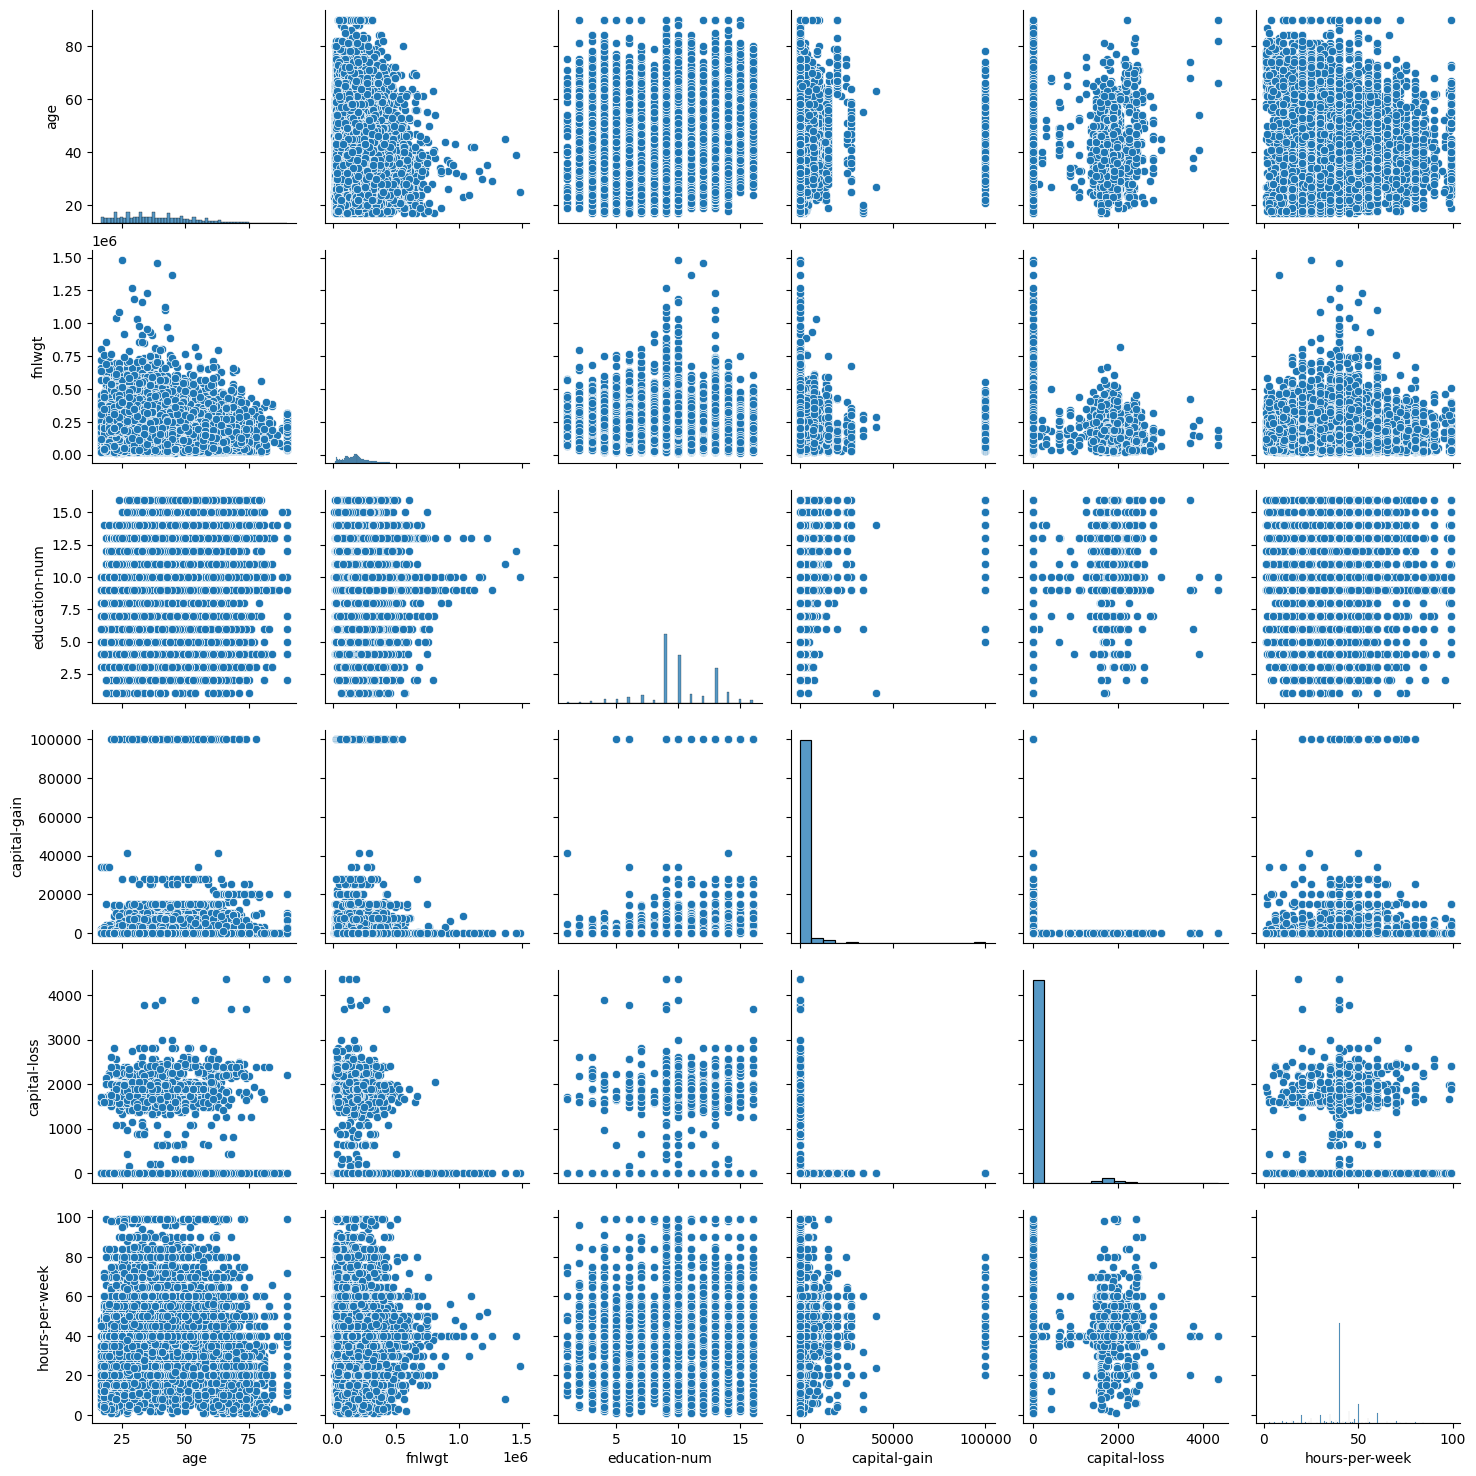

In [7]:
# Visualize pairwise scatterplots of numerical features
sns.pairplot(df[num_columns])

### 3.3 Bias

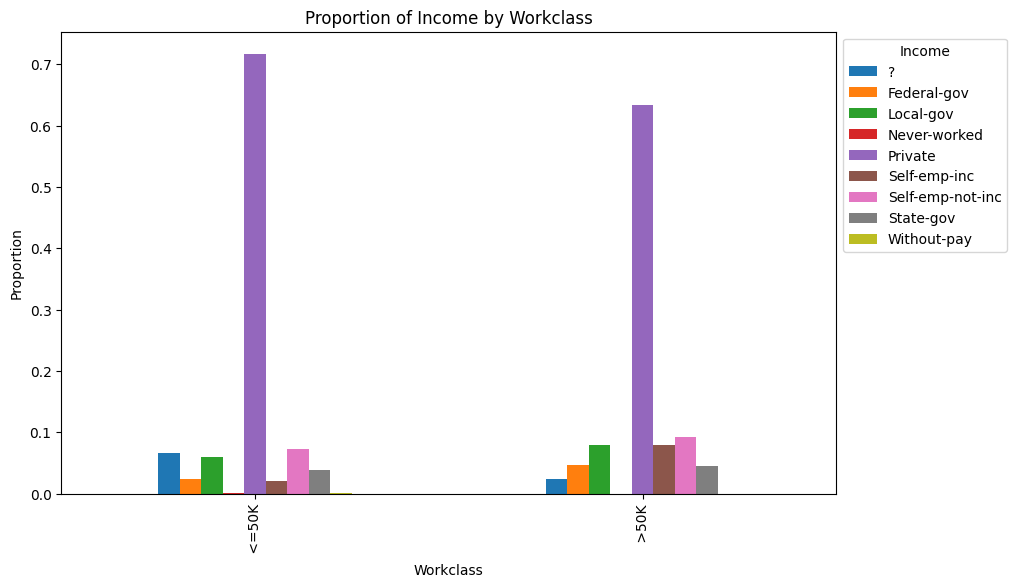

In [8]:
# Create a barchart of income by workclass

import matplotlib.cm as cm
colors = cm.tab10.colors

# Group data by workclass and income
df['workclass'] = df['workclass'].str.strip()
workclass_income = df.groupby(["income", "workclass"])["workclass"].count().unstack()

# Normalize counts within each income category to get proportions
workclass_income_norm = workclass_income.div(workclass_income.sum(axis=1), axis=0)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))

workclass_income_norm.plot(kind='bar', ax=ax, color=colors)

# Set axis labels and title
ax.set_xlabel("Workclass")
ax.set_ylabel("Proportion")
ax.set_title("Proportion of Income by Workclass")

# Set legend
ax.legend(title="Income", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


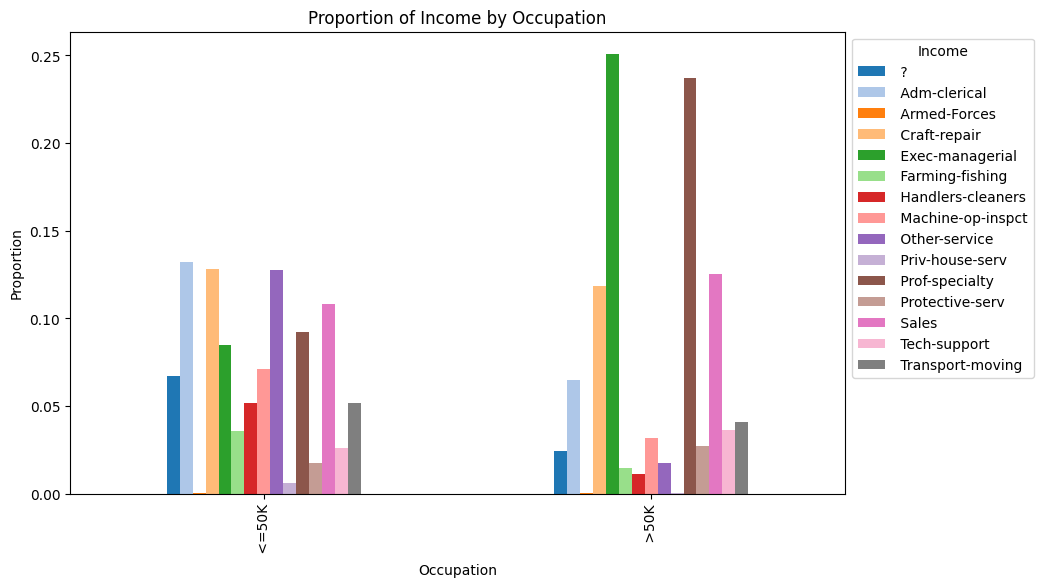

In [9]:
# Create a barchart of income by occupation

import matplotlib.cm as cm
colors = cm.tab20.colors
# Group data by income and occupation
income_occupation = df.groupby(["income", "occupation"])["occupation"].count().unstack()

# Normalize counts within each income category to get proportions
income_occupation_norm = income_occupation.div(income_occupation.sum(axis=1), axis=0)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))

income_occupation_norm.plot(kind='bar', ax=ax, color=colors)

#Set axis labels and title
ax.set_xlabel("Occupation")
ax.set_ylabel("Proportion")
ax.set_title("Proportion of Income by Occupation")

#Set legend
ax.legend(title="Income", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


## 4. Data Preprocessing and Feature Engineering


### 4.1 Handling Missing data or Outliers 

#### Introducing faulty data records in the dataset

In [10]:
pct_missing = 0.02 # percentage of missing values to introduce
pct_outliers = 0.02 # percentage of outliers to introduce

# convert integer columns to float
df[df.select_dtypes(include='int64').columns] = df.select_dtypes(include='int64').astype(float)

for col in df.columns:
    # generate missing values
    num_missing = int(len(df) * pct_missing)
    rows_missing = np.random.choice(df.index, num_missing, replace=False)
    cols_missing = np.random.choice(df.columns, num_missing, replace=True)
    for row, col in zip(rows_missing, cols_missing):
        if df[col].dtype == np.float64: # if column is float
            df.at[row, col] = np.nan

    # generate outliers
    num_outliers = int(len(df) * pct_outliers)
    rows_outliers = np.random.choice(df.index, num_outliers, replace=False)
    cols_outliers = np.random.choice(df.columns, num_outliers, replace=True)
    for row, col in zip(rows_outliers, cols_outliers):
        if df[col].dtype == np.float64: # if column is float
            std = df[col].std()
            df.at[row, col] += np.random.choice([-1, 1]) * np.random.uniform(1.5, 3) * std

# Display the first few rows of the dataset
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.310948,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.000000,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,NaN,13.0,United-States,<=50K
2,38.000000,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.000000,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.000000,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


#### Removing the faulty data records in the dataset

In [11]:
# Remove rows containing missing values
df = df.dropna()

# Select only the numeric columns from the DataFrame for outlier detection
numeric_df = df.select_dtypes(include=[np.number])

# Remove rows containing outliers using IQR method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame to remove outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the first few rows of the dataset
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
11,30.0,State-gov,141297.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K


### 4.2 Data Transformation

#### Log Transformation of Capital Gains

In [12]:
# Apply log transformation to capital gains and losses
df["log_capital_gain"] = np.log(df["capital-gain"]+1)
df["log_capital_losses"] = np.log(df["capital-loss"]+1)


#### Encoding Categorical Data

In [13]:
# Encode categorical data using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"])
# Perform label encoding of target variable
le = LabelEncoder()
df_encoded["income"] = le.fit_transform(df_encoded["income"])
df_encoded.head(5)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,log_capital_gain,log_capital_losses,workclass_?,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
7,52.0,209642.0,9.0,0.0,0.0,45.0,1,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
11,30.0,141297.0,13.0,0.0,0.0,40.0,1,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False


#### Feature Scaling

In [14]:
# Scale numerical data using Min-Max scaling
scaler = MinMaxScaler()
df_encoded[num_columns] = scaler.fit_transform(df_encoded[num_columns])
df_encoded.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,log_capital_gain,log_capital_losses,workclass_?,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
2,0.499733,0.575946,0.376233,0.0,0.0,0.382204,0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
3,0.687333,0.615093,0.250822,0.0,0.0,0.382204,0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
4,0.374667,0.827886,0.627054,0.0,0.0,0.382204,0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
7,0.674827,0.563624,0.376233,0.0,0.0,0.639619,1,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
11,0.399680,0.423364,0.627054,0.0,0.0,0.382204,1,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False


## 5. Interpretability 

### 5.1 Model Training and Evaluation

In [15]:
# Train and Evaluate a Random Forest Model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=["income"]), df_encoded["income"], test_size=0.2, random_state=42)

param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20, None]}

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
# Perform grid search for hypyerparameter tuning
grid_search = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)
y_pred = grid_search.predict(X_test)
# Print the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(acc))

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.836


### 5.2 Feature importance

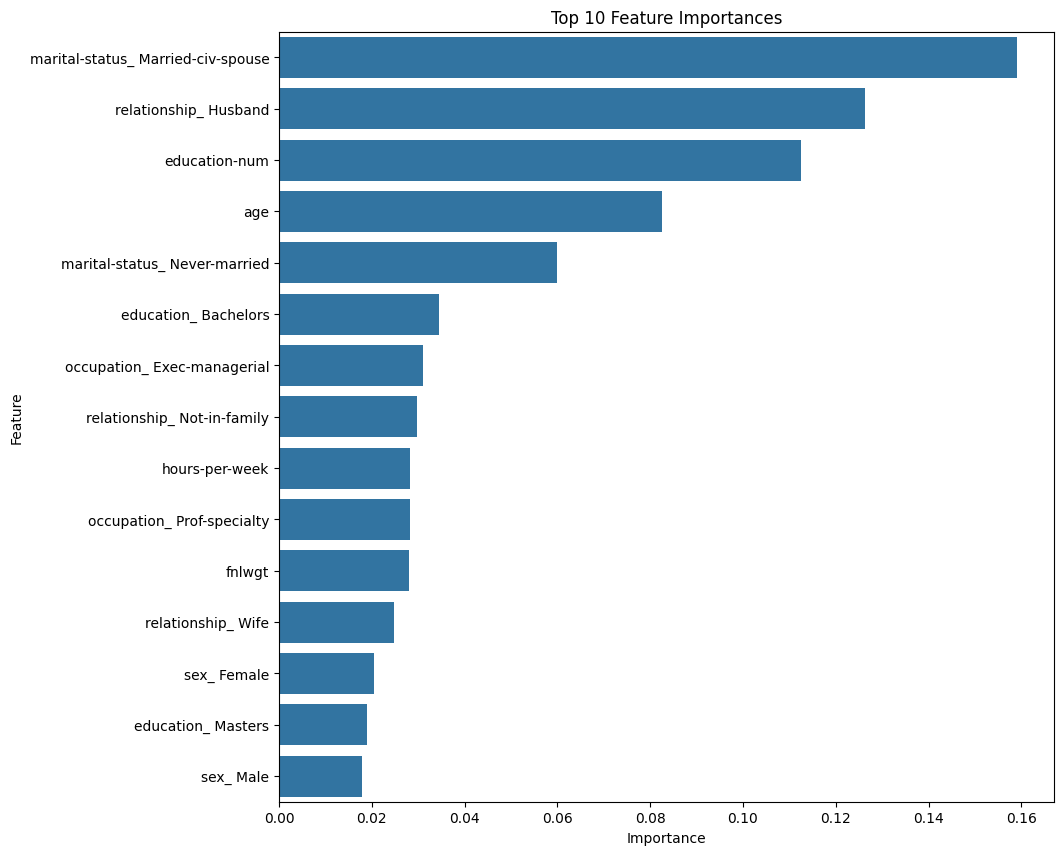

In [16]:
# Create a RF instance with the best parameters
rf_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   random_state=42)
rf_best.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_best.feature_importances_, index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=False)

# Select top 10 features
top_features = feature_importances.head(15)

# Plot feature importances
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y=top_features.index, data=top_features)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()